# Vector Similarity in Spacy

**Important**: needs a pipeline that has word vectors included. en_core_web_sm does NOT support vectors.

* spaCy can compare two objects and predict similarity
* Doc.similarity(), Span.similarity() and Token.similarity()
* Take another object and return a similarity score (0 to 1)


In [2]:
%%html
<style>
table {float:left}
</style>

In [100]:
from itertools import combinations
import numpy as np
import matplotlib.pyplot as plt
import spacy
from spacy import displacy

# Document

In [3]:
nlp = spacy.load("en_core_web_lg")

In [90]:
doc = nlp("""
Hello Dr. Levance, hope you have been well. 
I am writing this email about the patcient Macky Robert who had injury.
Apple is looking at buying U.K. startup for $1 billion. 
Softbank acquired ARM with $32 billion in 2016.
Sushi goes well with soy source.
""")

# Embedding Vector

In [148]:
doc.vector.shape

(300,)

In [147]:
sentence = next(doc.sents)
sentence.vector.shape

(300,)

# Sentence Similarities

In [87]:
sentences = doc.sents
similarities = []
previous = next(sentences)
for sentence in sentences:
    similarities.append(sentence.similarity(previous))

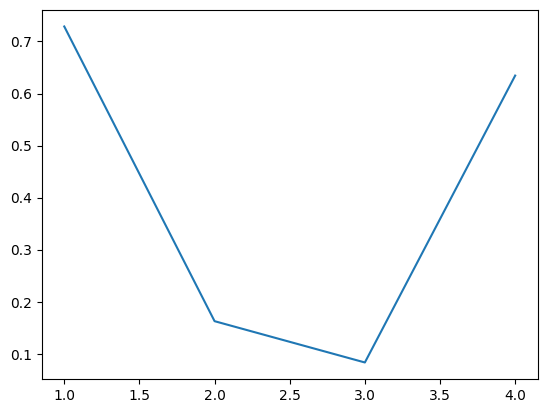

In [88]:
plt.plot(list(range(1, 1+len(similarities))), similarities)

# Similarity with salutations

In [130]:
salutations = [
    nlp(_sentence) for _sentence in [
        "hi",
        "dear",
        "to",
        "hello",
        "good morning",
        "good afternoon",
        "good evening",
    ]
]

In [142]:
def similiarity_with_salutations(sentence):
    return sum([
        salute.similarity(sentence)
        for salute in salutations
    ]) / len(salutations)

In [144]:
for sentence in doc.sents:
    print(f"distance {similiarity_with_salutations(sentence):20}: {sentence.text.strip()}")

distance   0.3672334578815083: Hello Dr. Levance, hope you have been well.
distance  0.32671407068833364: I am writing this email about the patcient Macky Robert who had injury.
distance 0.044446690916190176: Apple is looking at buying U.K. startup for $1 billion.
distance -0.06648804964106445: Softbank acquired ARM with $32 billion in 2016.
distance  0.25953204940340635: Sushi goes well with soy source.
